## Practice 1: Training a XGBoost Regressor and Plot the Visualization on SHAP

Train a XGBoost regression model on the [California housing dataset](https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html). This dataset consists of 20,640 blocks of houses across California in 1990, where our goal is to predict the natural log of the median home price from 8 different features:

1. MedInc - median income in block group
2. HouseAge - median house age in block group
3. AveRooms - average number of rooms per household
4. AveBedrms - average number of bedrooms per household
5. Population - block group population
6. AveOccup - average number of household members
7. Latitude - block group latitude
8. Longitude - block group longitude

In [1]:
import pandas as pd
import shap
import xgboost
import sklearn
import warnings
import numpy as np
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')


# a classic housing price dataset
X,y = shap.datasets.california(n_points=1000)

# 100 instances to build explainer for computational efficiency 
# calculating SHAP values for the whole data X can be computationally expensive for large datasets
X100 = shap.utils.sample(X, 100)


# train XGBoost model
model_xgb = xgboost.XGBRegressor(n_estimators=100, max_depth=2).fit(X, y)

# build explainer
explainer_xgb = shap.Explainer(model_xgb, X100)

In [2]:
# Now that we have trained the model. Let's use the model to predict the prices of the two house blocks below.

data_los_angeles = {
    "MedInc": [10],
    "HouseAge": [50],
    "AveRooms": [6],
    "AveBedrms": [5],
    "Population": [1551.000000],
    "AveOccup": [4.180593],
    "Latitude": [34.0522],
    "Longitude": [-118.24]
}
data_san_francisco = {
    "MedInc": [10],
    "HouseAge": [15],
    "AveRooms": [6],
    "AveBedrms": [5],
    "Population": [1551.000000],
    "AveOccup": [4.180593],
    "Latitude": [37.7749],
    "Longitude": [-122.42]
}
# Convert dictionaries to DataFrames
df_los_angeles = pd.DataFrame(data_los_angeles)
df_san_francisco = pd.DataFrame(data_san_francisco)

# Concatenate the two DataFrames
combined_df = pd.concat([df_los_angeles, df_san_francisco], ignore_index=True)

In [18]:
# 1. Get the shapley values of the combined_df with explainer_xgb



# 2. Plot the waterfall and explain the house prices




## Practice2: Explaining a boosted tree model on a classification problem

"Census Income" dataset is widely used for machine learning tasks involving classification, particularly for exploring socio-economic factors' influence on income, and for studies in bias and fairness in AI models. 

The target variable is whether the individual earns more than $50,000 annually.

### Features:

1. Age: The age of the individual.
2. Workclass: The employment status (e.g., Private, Self-emp, Government).
3. Education-Num: The highest level of education in numerical form.
4. Marital Status: Marital status of the individual.
5. Occupation: The type of occupation.
6. Relationship: Family relationship status (e.g., Wife, Own-child, Husband).
7. Race: The race of the individual.
8. Sex: The gender of the individual.
9. Capital Gain: Income from investment sources, apart from wages/salary.
10. Capital Loss: Losses from investment sources.
11. Hours per week: Number of hours worked per week.
12. Country: Country of origin for the individual.

In [6]:
import xgboost
# a classic adult census dataset price dataset
X_adult,y_adult = shap.datasets.adult()

# train XGBoost model
model = xgboost.XGBClassifier(n_estimators=100, max_depth=2).fit(X_adult, y_adult*1, eval_metric="logloss")


# Initialize a SHAP background masker with a sample of 100 instances from the adult dataset
background_adult = shap.maskers.Independent(X_adult, max_samples=100)

In [7]:
#1. Build the shap explainer for the model on background_adult

#2. Get the shap values on X_adult


 96%|=================== | 31265/32561 [00:20<00:00]       

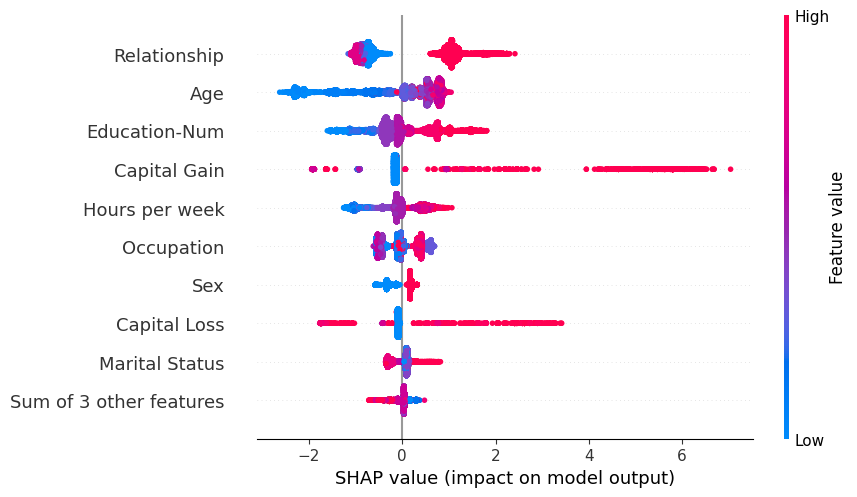

In [9]:
#3. Plot the beeswarm visualization and explain the pattern
